In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("files_for_lab\csv_files\marketing_customer_analysis.csv")

In [2]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [3]:
#Please note that we will use the column total_claim_amount later as the target variable

#X-y split.

X=numeric_data.drop(["Total Claim Amount"],axis=1)
Y=numeric_data["Total Claim Amount"]
Y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64

In [4]:
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


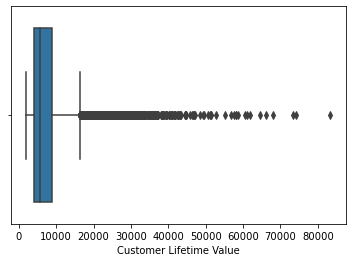

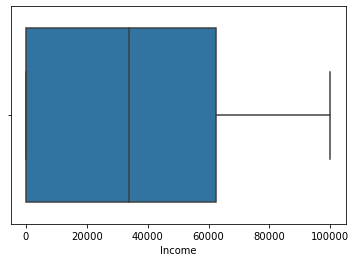

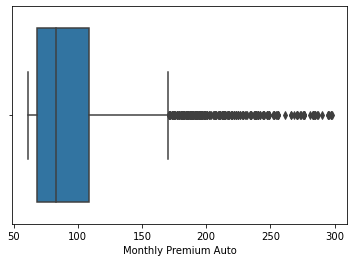

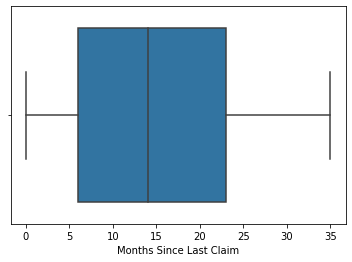

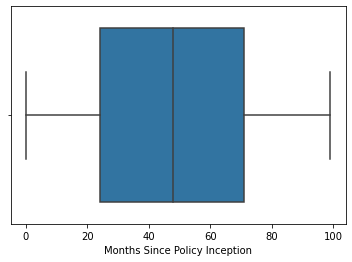

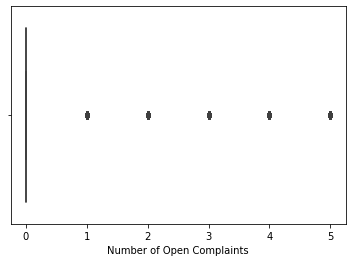

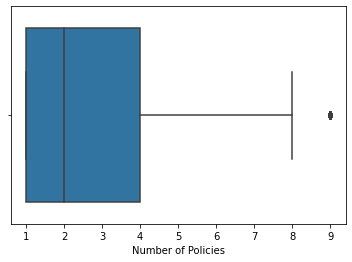

In [5]:
import warnings
warnings.filterwarnings("ignore")

for col in X.columns:
    sns.boxplot(X[col])
    plt.show()

In [6]:
X["Number of Policies"].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64

In [7]:
X["Number of Open Complaints"].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64

In [8]:
X["Income"].value_counts()

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: Income, Length: 5694, dtype: int64

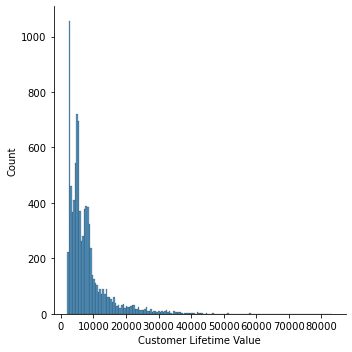

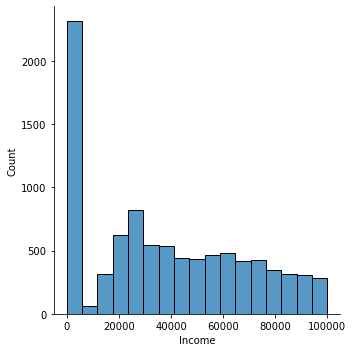

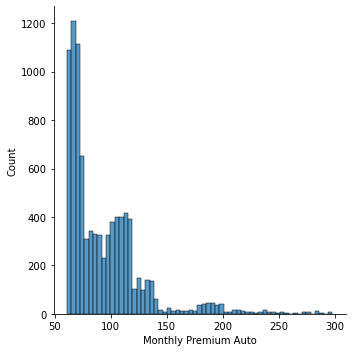

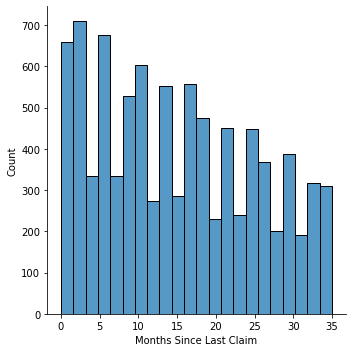

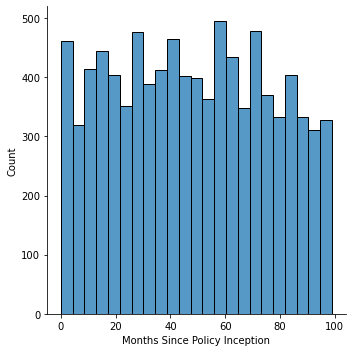

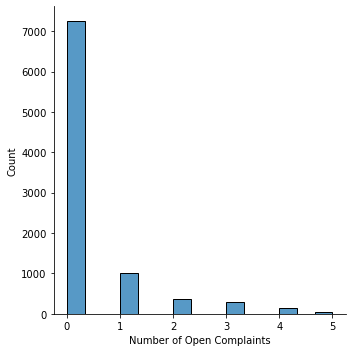

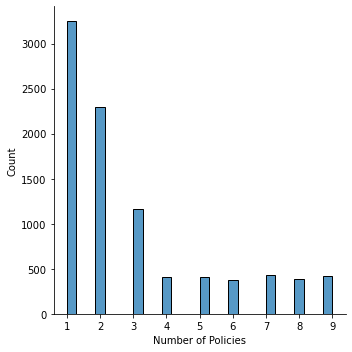

In [9]:
for col in X.columns:
    sns.displot(X[col])
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

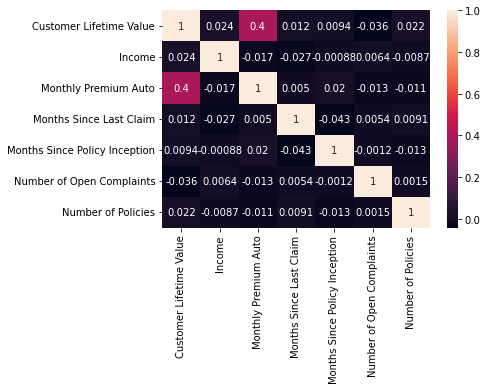

In [10]:
sns.heatmap(X.corr(),annot=True)
plt.show

In [11]:
#1st column

iqr = np.percentile(X["Customer Lifetime Value"],75) - np.percentile(X["Customer Lifetime Value"],25)
iqr

4967.915247000001

In [12]:
upper_limit=np.percentile(X["Customer Lifetime Value"],75)+iqr*1.5
upper_limit

16414.039911750002

In [13]:
lower_limit=np.percentile(X["Customer Lifetime Value"],25)-iqr*1.5
lower_limit

-3457.6210762500014

In [14]:
#X=X[(X["Customer Lifetime Value"]>lower_limit) & (data["Customer Lifetime Value"]<upper_limit)]
#sns.histplot(X["Customer Lifetime Value"])
#plt.show

#lets try another processes

In [15]:
from scipy import stats

len(X[X["Customer Lifetime Value"]<=0])

0

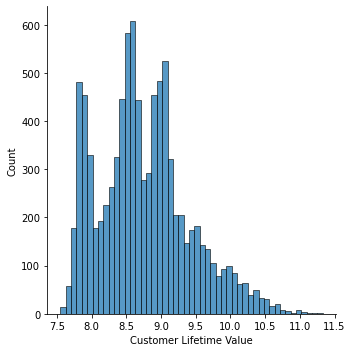

In [16]:
sns.displot(np.log(X["Customer Lifetime Value"]))
plt.show()

##### BoxCox - best process for this column

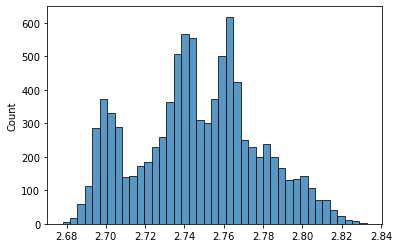

In [17]:
arr, lmbda=stats.boxcox(X["Customer Lifetime Value"])
sns.histplot(arr)
plt.show()

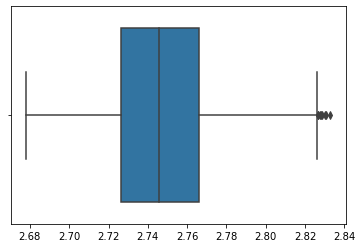

In [18]:
sns.boxplot(arr)
plt.show()

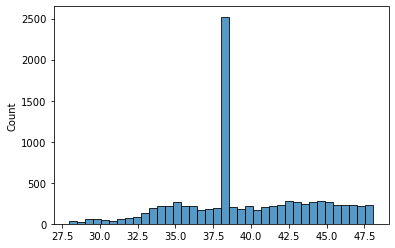

In [19]:
#Income
X["Income_temp"]=np.where(X["Income"]<0,0,X["Income"])
X["Income_temp"]=X["Income_temp"].replace(0,X["Income"].mean())

arr, lmbda=stats.boxcox(X["Income_temp"])
sns.histplot(arr)
plt.show()

In [20]:
X["Income_temp"].mode()

0    37657.380009
Name: Income_temp, dtype: float64

In [21]:
X["Income_temp"].value_counts()

37657.380009    2317
95697.000000      12
27972.000000       7
25370.000000       7
61108.000000       7
                ... 
36529.000000       1
25859.000000       1
38179.000000       1
70190.000000       1
21941.000000       1
Name: Income_temp, Length: 5694, dtype: int64

In [22]:
X = X[X["Income_temp"] != X['Income_temp'].mode()[0]]

X["Income_temp"].value_counts()

95697.0    12
20978.0     7
25965.0     7
25370.0     7
24910.0     7
           ..
67588.0     1
36529.0     1
25859.0     1
38179.0     1
21941.0     1
Name: Income_temp, Length: 5693, dtype: int64

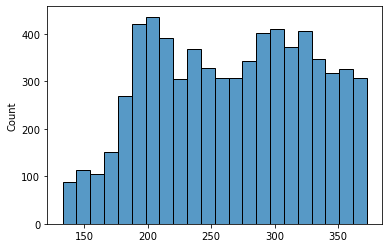

In [23]:
arr, lmbda=stats.boxcox(X["Income_temp"])
sns.histplot(arr)
plt.show()

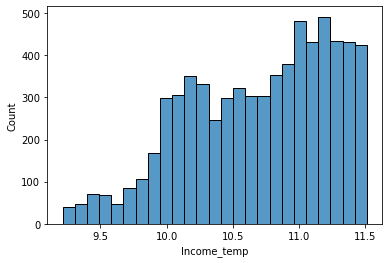

In [24]:
sns.histplot(np.log(X["Income_temp"]))
plt.show()

Dont know how to deal with the high value count...

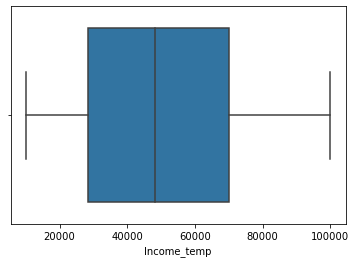

In [25]:
sns.boxplot(X["Income_temp"])
plt.show()

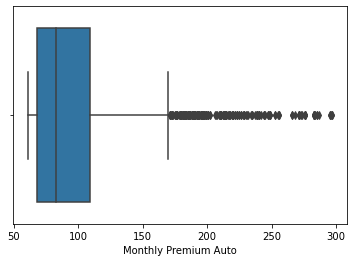

In [26]:
#Monthly Premium Auto

sns.boxplot(X["Monthly Premium Auto"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

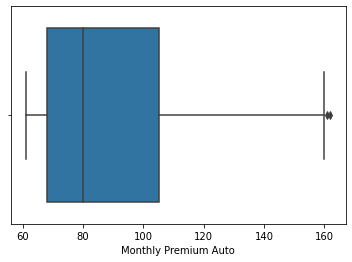

In [27]:
iqr = np.percentile(X["Monthly Premium Auto"],75) - np.percentile(X["Monthly Premium Auto"],25)
upper_limit2=np.percentile(X["Monthly Premium Auto"],75)+iqr*1.3
#lower_limit2=np.percentile(X["Monthly Premium Auto"],25)-iqr*1.3

X=X[(X["Monthly Premium Auto"]<upper_limit2)]
sns.boxplot(X["Monthly Premium Auto"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

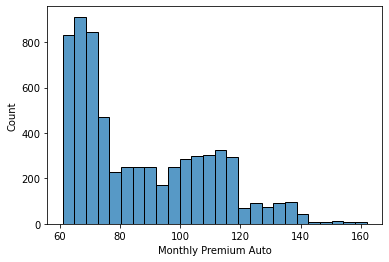

In [28]:
sns.histplot(X["Monthly Premium Auto"])
plt.show

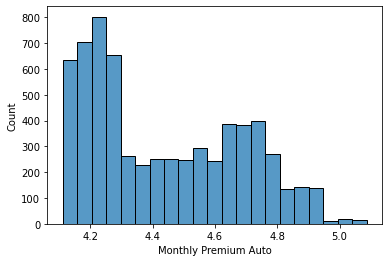

In [29]:
sns.histplot(np.log(X["Monthly Premium Auto"]))
plt.show()

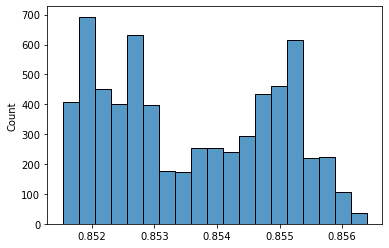

In [30]:
arr, lmbda=stats.boxcox(X["Monthly Premium Auto"])
sns.histplot(arr)
plt.show()

In [31]:
X["Monthly Premium Auto"].value_counts()

65     271
71     242
66     238
63     227
61     216
      ... 
157      1
162      1
142      1
141      1
161      1
Name: Monthly Premium Auto, Length: 100, dtype: int64

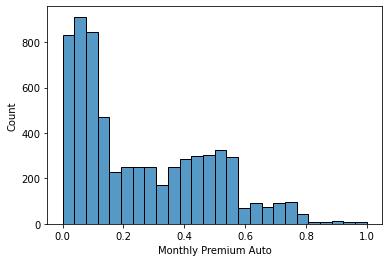

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the column to a 2D array (required by the scaler)
column_data = X["Monthly Premium Auto"].values.reshape(-1, 1)

# Apply the scaler to the column data
scaled_data = scaler.fit_transform(column_data)

# Replace the original column with the scaled data
X["Monthly Premium Auto"] = scaled_data

sns.histplot(X["Monthly Premium Auto"])
plt.show()


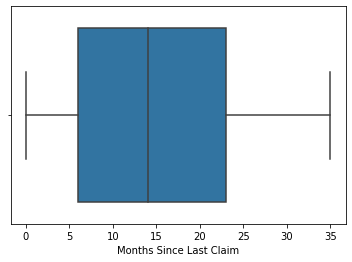

In [33]:
#Months Since Last Claim

sns.boxplot(X["Months Since Last Claim"])
plt.show()

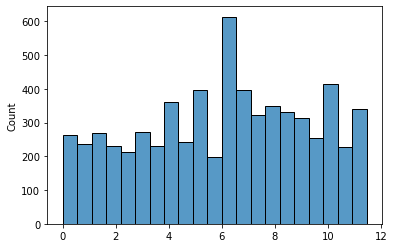

In [34]:
X["Months Since Last Claim_temp"]=np.where(X["Months Since Last Claim"]<0,0,X["Months Since Last Claim"])
X["Months Since Last Claim_temp"]=X["Months Since Last Claim_temp"].replace(0,X["Months Since Last Claim"].mean())

arr, lmbda=stats.boxcox(X["Months Since Last Claim_temp"])
sns.histplot(arr)
plt.show()

In [35]:
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Income_temp,Months Since Last Claim_temp
0,2763.519279,56274,0.079208,32,5,0,1,56274.0,32.000000
2,12887.431650,48767,0.465347,18,38,0,2,48767.0,18.000000
4,2813.692575,43836,0.118812,12,44,0,1,43836.0,12.000000
5,8256.297800,62902,0.079208,14,94,0,2,62902.0,14.000000
6,5380.898636,55350,0.059406,0,13,0,9,55350.0,15.024718
...,...,...,...,...,...,...,...,...,...
9127,5032.165498,66367,0.029703,6,48,0,3,66367.0,6.000000
9128,4100.398533,47761,0.425743,16,58,0,1,47761.0,16.000000
9129,23405.987980,71941,0.118812,18,89,0,2,71941.0,18.000000
9130,3096.511217,21604,0.178218,14,28,0,1,21604.0,14.000000


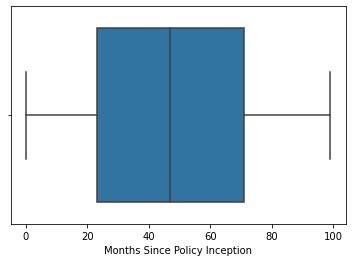

In [36]:
#Months Since Policy Inception
sns.boxplot(X["Months Since Policy Inception"])
plt.show()

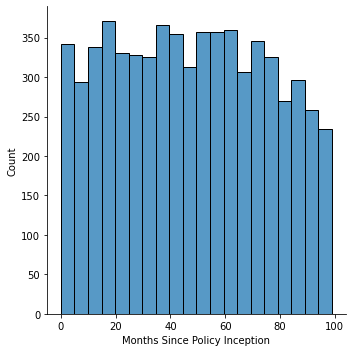

In [37]:
sns.displot(X["Months Since Policy Inception"])
plt.show()

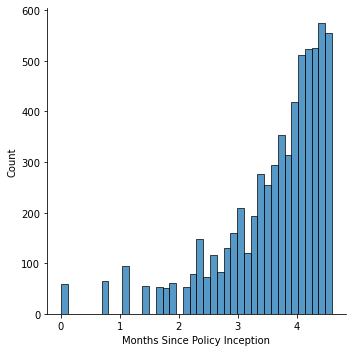

In [38]:
sns.displot(np.log(X["Months Since Policy Inception"]))
plt.show()

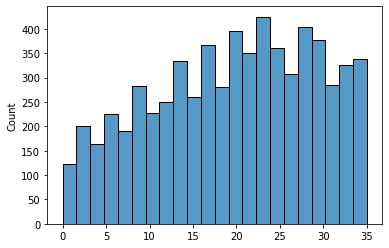

In [39]:
X["Months Since Policy Inception_temp"]=np.where(X["Months Since Policy Inception"]<0,0,X["Months Since Policy Inception"])
X["Months Since Policy Inception_temp"]=X["Months Since Policy Inception_temp"].replace(0,X["Months Since Policy Inception"].mean())

arr, lmbda=stats.boxcox(X["Months Since Policy Inception_temp"])
sns.histplot(arr)
plt.show()

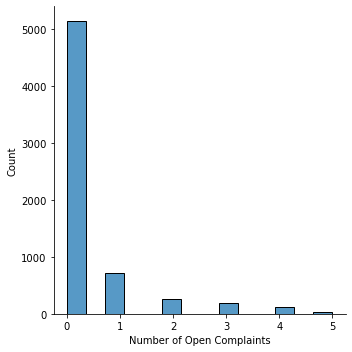

In [40]:
#Number of Open Complaints
sns.displot(X["Number of Open Complaints"])
plt.show()

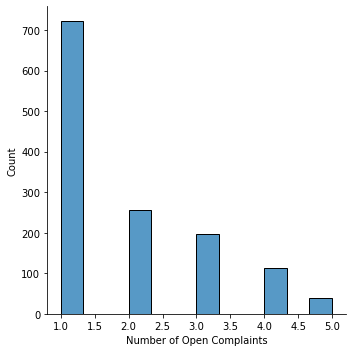

In [41]:
X = X[X["Number of Open Complaints"] > 0]
sns.displot(X["Number of Open Complaints"])
plt.show()

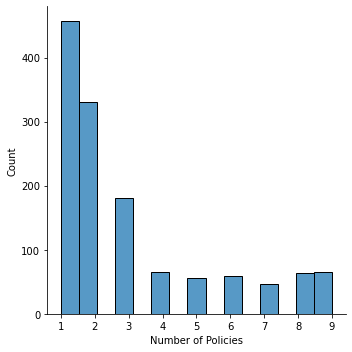

In [42]:
#Number of Policies
sns.displot(X["Number of Policies"])
plt.show()

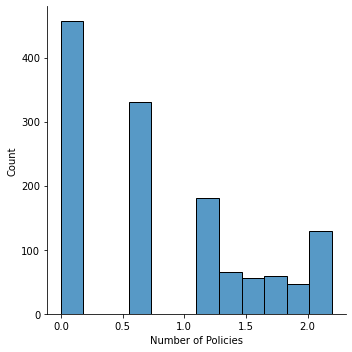

In [43]:
sns.displot(np.log(X["Number of Policies"]))
plt.show()

The last 2 columns "Number of Policies" and "Number of Open Complaints" can be dropped as they are out of scope comparing to the rest of the data.

In [44]:
X_2=X.drop(["Number of Open Complaints", "Number of Policies"], axis=1)
X_2

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Income_temp,Months Since Last Claim_temp,Months Since Policy Inception_temp
12,8798.797003,77026,0.485149,9,82,77026.0,9.0,82.0
13,8819.018934,99845,0.485149,23,25,99845.0,23.0,25.0
14,5384.431665,83689,0.089109,21,10,83689.0,21.0,10.0
15,7463.139377,24599,0.029703,12,50,24599.0,12.0,50.0
28,12902.560140,86584,0.495050,33,54,86584.0,33.0,54.0
...,...,...,...,...,...,...,...,...
9087,4781.821034,30361,0.574257,28,48,30361.0,28.0,48.0
9092,4547.321823,29031,0.000000,7,19,29031.0,7.0,19.0
9105,5551.398167,36918,0.148515,28,77,36918.0,28.0,77.0
9111,2845.520933,86631,0.118812,7,44,86631.0,7.0,44.0


Also we can use only the temp columns as they are better worked and normalized

In [45]:
X_3=X_2.drop(["Months Since Policy Inception", "Income","Months Since Policy Inception"], axis=1)
X_3

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Income_temp,Months Since Last Claim_temp,Months Since Policy Inception_temp
12,8798.797003,0.485149,9,77026.0,9.0,82.0
13,8819.018934,0.485149,23,99845.0,23.0,25.0
14,5384.431665,0.089109,21,83689.0,21.0,10.0
15,7463.139377,0.029703,12,24599.0,12.0,50.0
28,12902.560140,0.495050,33,86584.0,33.0,54.0
...,...,...,...,...,...,...
9087,4781.821034,0.574257,28,30361.0,28.0,48.0
9092,4547.321823,0.000000,7,29031.0,7.0,19.0
9105,5551.398167,0.148515,28,36918.0,28.0,77.0
9111,2845.520933,0.118812,7,86631.0,7.0,44.0
